# 📊 Análisis Cafeterías de España



## **1. Carga y Configuración del Entorno**
- Importación de librerías.
- Carga del Dataset.
- Vizualizamos información del DataSet.


In [1]:
# 1.1 Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [234]:
# 1.2 Carga de datos
df = pd.read_csv('ventas_cafeterias_espana_bares.csv')

In [235]:
# 1.3 Vizualización de información del DataSet
print(f"- Dimensiones del dataset: {df.shape}")
print("\n- Tipos de datos:")
print(df.dtypes)
print("\n- Estadísticas descriptivas:")
display(df.describe())
print("\n- Primeras 5 filas del dataset:")
display(df.head())


- Dimensiones del dataset: (301514, 9)

- Tipos de datos:
ticket_id           int64
fecha_hora         object
ciudad             object
bar                object
producto           object
categoria          object
precio_unitario    object
cantidad            int64
metodo_pago        object
dtype: object

- Estadísticas descriptivas:


,ticket_id,cantidad
count,301514.000000,301514.000000
mean,149987.679915,1.349838
std,86596.089816,0.572184
min,1.000000,1.000000
25%,74989.250000,1.000000
50%,149979.500000,1.000000
75%,224966.750000,2.000000
max,300000.000000,3.000000



- Primeras 5 filas del dataset:


,ticket_id,fecha_hora,ciudad,bar,producto,categoria,precio_unitario,cantidad,metodo_pago
0,1,2025-03-03 22:25:16,Móstoles,Lounge Móstoles Sur,Croissant,reposteria,NaN,3,Bizum
1,2,2025-02-27 20:13:33,Eivissa,Cervecería Eivissa Puerto,Refresco,bebida,3.97,2,Efectivo
2,3,2025-09-14 23:53:31,Alicante,Café Alicante Este,Sandwich mixto,comida,3.31,1,Tarjeta
3,4,2025-07-12 10:06:51,Eivissa,Bar Eivissa Plaza Mayor,Latte,bebida,1.68,1,Efectivo
4,5,2025-03-02 03:42:48,Getafe,Cervecería Getafe Río,Napolitana,reposteria,1.7,2,Tarjeta


## **2. Limpieza y Preprocesamiento de Datos**

- Detección de valores nulos.
- Tratamiento de valores faltantes.
- Corrección de tipos de datos.
- Resetear el índice trás la limpieza.
- Limpieza de textos y eliminación de duplicados.

In [236]:
# 2.1 Detección de valores nulos.
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
ticket_id             0
fecha_hora            0
ciudad                0
bar                   0
producto           3015
categoria          2938
precio_unitario    3067
cantidad              0
metodo_pago        3042
dtype: int64


In [237]:
# 2.2 Tratamiento de valores faltantes.
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Comprobar cambios:
print("\nValores nulos después del tratamiento:")
print(df.isnull().sum())


Valores nulos después del tratamiento:
ticket_id          0
fecha_hora         0
ciudad             0
bar                0
producto           0
categoria          0
precio_unitario    0
cantidad           0
metodo_pago        0
dtype: int64


In [238]:
# 2.3 Corrección de tipos de datos.

# - Reenplazar "/" por "-" en la columna fecha_hora (corregir formato):
df['fecha_hora'] = df['fecha_hora'].astype(str).str.replace('/', '-')

# - Asegurar que 'cantidad' y 'precio_unitario' son numéricos:
df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce')
df['precio_unitario'] = pd.to_numeric(df['precio_unitario'], errors='coerce')

# Comprobar los cambios:
print(df.dtypes)


ticket_id            int64
fecha_hora          object
ciudad              object
bar                 object
producto            object
categoria           object
precio_unitario    float64
cantidad             int64
metodo_pago         object
dtype: object


In [2]:
# 2.4 Limpieza de textos y eliminación de duplicados.

# - Normalizar textos a minúsculas y quitar espacios.
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# - Corregir errores de duplicados en la columna 'categoria':
df['categoria'] = df['categoria'].replace({
    'repost': 'reposteria',
    're-post': 'reposteria',
    'comída': 'comida', 
    'bebída': 'bebida'
})

# - Eliminar filas duplicadas.
df = df.drop_duplicates()

# Comprobar los cambios:
df['categoria'].unique()

NameError: name 'df' is not defined

In [ ]:
# 2.5 Resetear el índice tras la limpieza.
df = df.reset_index(drop=True)
print("\nDatos limpios. Dimensiones actuales:", df.shape)


Datos limpios. Dimensiones actuales: (301258, 9)


## **3. Ingeniería de Variables (Feature Engineering)**

- Conversión y desglose temporal.
- Creación de KPIs de negocio.

In [ ]:
# 3.1 Conversión y desglose temporal.

# - Convertimos la fecha a objeto datetime.
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])

# - Columnas nuevas: año, hora, día de la semana, mes a partir de 'fecha_hora'.
df['año'] = df['fecha_hora'].dt.year
df['hora'] = df['fecha_hora'].dt.hour
df['dia_semana'] = df['fecha_hora'].dt.day_name()
df['mes'] = df['fecha_hora'].dt.month_name()

# Comprobamos los cambios:
print(df.dtypes)


ticket_id                   int64
fecha_hora         datetime64[ns]
ciudad                     object
bar                        object
producto                   object
categoria                  object
precio_unitario           float64
cantidad                    int64
metodo_pago                object
año                         int64
hora                        int64
dia_semana                 object
mes                        object
dtype: object


In [ ]:
# 3.2 Creación de KPIs de negocio.

# - Columna nueva: Total de ganancias.
df['ventas_totales'] = df['precio_unitario'] * df['cantidad']


# - Columna nueva: Tipo de local basado en el nombre del bar.
df['tipo_local'] = df['bar'].apply(
    lambda x: x.split()[0].lower() if isinstance(x, str) else 'otro'
)


# - Definimos solo los tipos válidos de hostelería, el resto se agrupa como 'otro'.
tipos_validos = [
    'lounge', 'bar', 'cervecería', 'café', 'gastrobar', 'taberna',
    'cortijo', 'chocolatería', 'bodega', 'horchatería', 'granja'
]

df['tipo_local'] = df['tipo_local'].where(
    df['tipo_local'].isin(tipos_validos),
    other='otro'
)


# Comprobamos los cambios:
df[['bar', 'tipo_local', 'ventas_totales']].head(10)



,bar,tipo_local,ventas_totales
0,lounge móstoles sur,lounge,5.31
1,cervecería eivissa puerto,cervecería,7.94
2,café alicante este,café,3.31
3,bar eivissa plaza mayor,bar,1.68
4,cervecería getafe río,cervecería,3.40
5,lounge alicante oeste,lounge,1.40
6,gastrobar burgos norte,gastrobar,2.52
7,bar ourense casco viejo,bar,3.05
8,bar ponferrada estación,bar,2.94
9,taberna la dolores,taberna,5.77


## **4. Análisis Exploratorio Técnico**

- Análisis de la Estructura de Precios.
- Análisis de Variabilidad de Precios por Categoría.
- Análisis de la Evolución Temporal de Ventas.
- Análisis de la Relación Precio-Ingreso.
- Comparativa de Estrategia de Precios.
- Panel de Control General (Dashboard Operativo).
- Análisis de Segmentación de Ventas por Categoría.
- Análisis de Correlaciones Estadísticas.


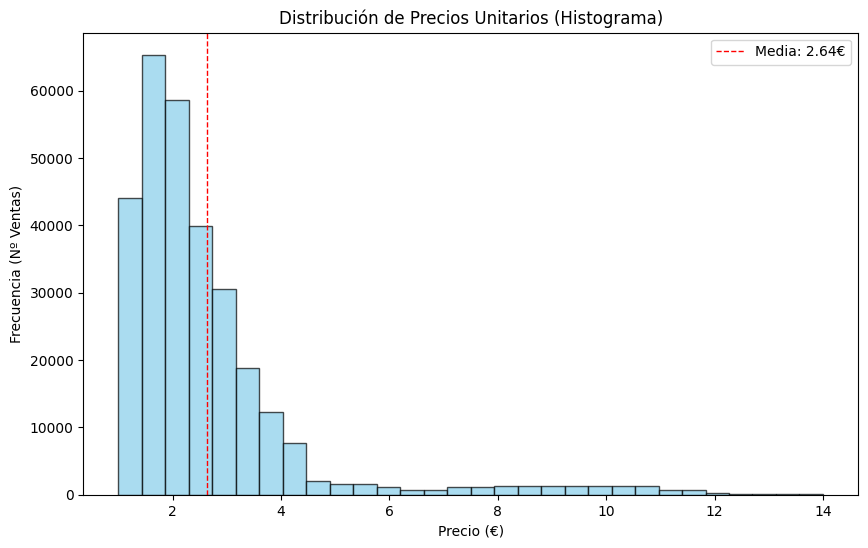

In [ ]:
# 4.1 Análisis de Hábitos de Consumo (Horarios)

# Objetivo: Ver cómo se distribuyen los precios. ¿Son caros o baratos?
plt.figure(figsize=(10, 6))

# Histograma simple
plt.hist(df['precio_unitario'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribución de Precios Unitarios (Histograma)')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia (Nº Ventas)')
plt.axvline(df['precio_unitario'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {df["precio_unitario"].mean():.2f}€')
plt.legend()
plt.show()

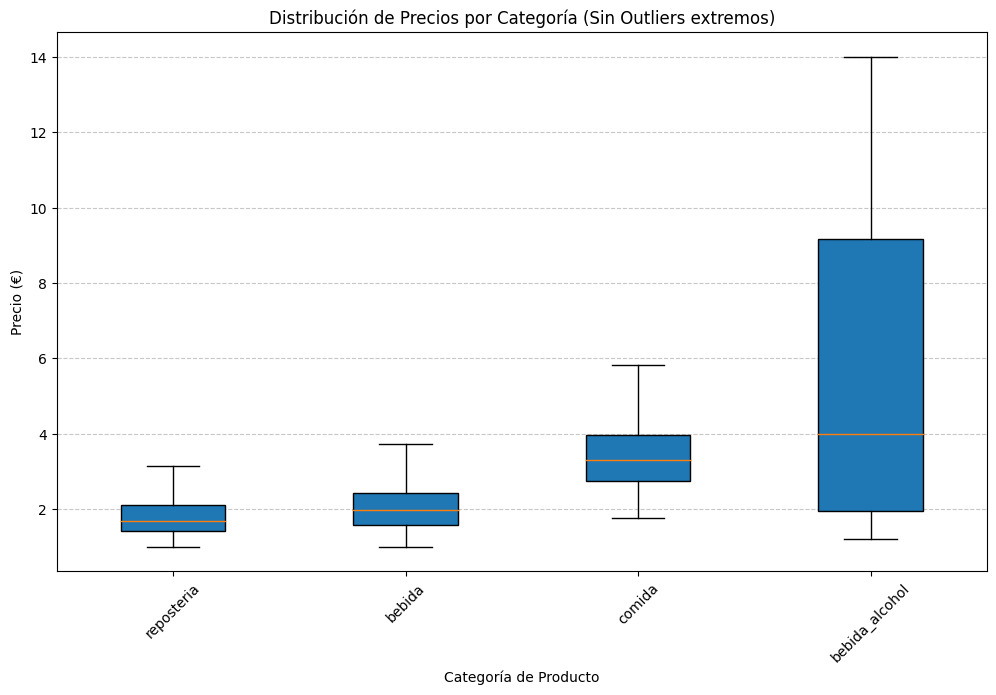

In [ ]:
# 4.2 Análisis de Variabilidad de Precios (Boxplot) - VERSIÓN BLINDADA


# 1. Aseguramos limpieza (por si acaso no se ejecutó bien lo anterior)
# Convertimos a números forzosamente, lo que no sea número se convierte en NaN
df['precio_unitario'] = pd.to_numeric(df['precio_unitario'], errors='coerce')
# Limpiamos nombres de categorías
df['categoria'] = df['categoria'].astype(str).str.lower().str.strip()

# 2. Preparamos los datos filtrando Nulos
# Solo cogemos filas donde haya precio Y categoría
data_clean = df.dropna(subset=['precio_unitario', 'categoria'])

# 3. Creamos la lista para el gráfico
categorias_unicas = data_clean['categoria'].unique()
datos_para_plot = []
nombres_ejes = []

for cat in categorias_unicas:
    # Extraemos precios de esa categoría
    precios = data_clean[data_clean['categoria'] == cat]['precio_unitario']
    
    # Solo añadimos si hay datos
    if len(precios) > 0:
        datos_para_plot.append(precios.values)
        nombres_ejes.append(cat)

# 4. Pintamos el gráfico
plt.figure(figsize=(12, 7))

# showfliers=False oculta los puntos extremos muy lejanos para que el gráfico no se aplaste
plt.boxplot(datos_para_plot, labels=nombres_ejes, patch_artist=True, showfliers=False)

plt.title('Distribución de Precios por Categoría (Sin Outliers extremos)')
plt.ylabel('Precio (€)')
plt.xlabel('Categoría de Producto')
plt.xticks(rotation=45) # Rotamos nombres para que no se monten
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

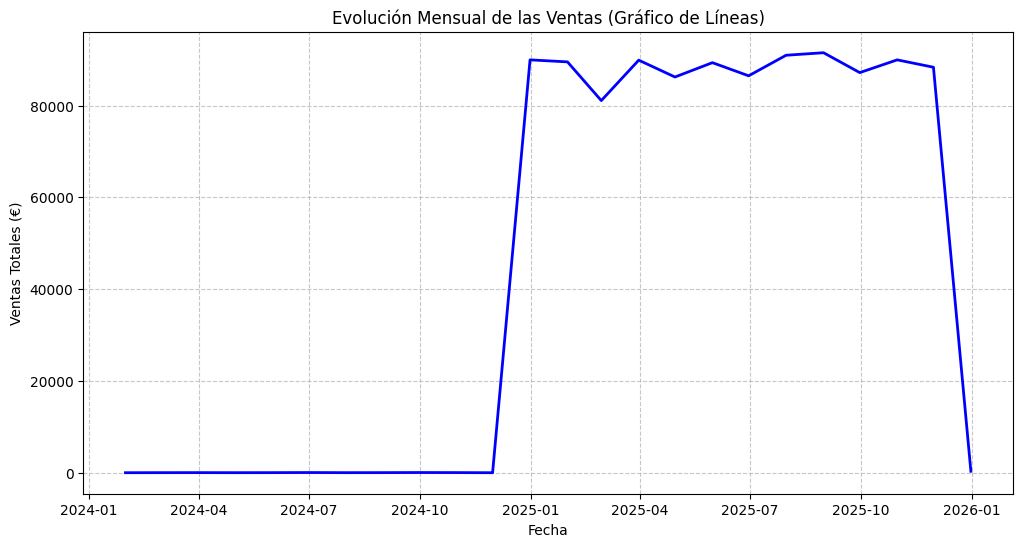

In [ ]:
# 4.3 Gráfico de Líneas (Tendencia Temporal).

# - Objetivo: Ver la evolución de ventas a lo largo de los meses

# - Agrupamos por meses ('M') de forma instantánea.
ventas_mes = df.set_index('fecha_hora')['ventas_totales'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(ventas_mes.index, ventas_mes.values, linestyle='-', color='blue', linewidth=2)

plt.title('Evolución Mensual de las Ventas (Gráfico de Líneas)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (€)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

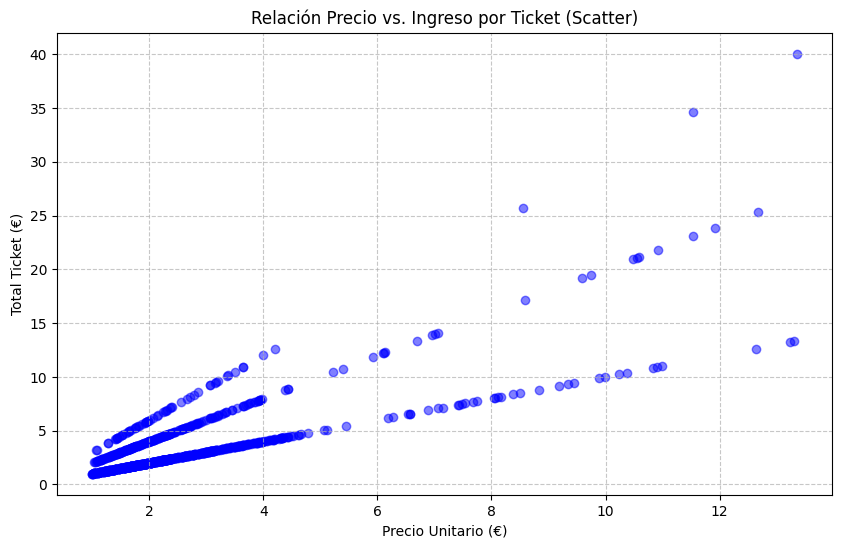

In [ ]:
# 4.4 Scatter Plot (Dispersión Simple)

# Objetivo: Relación entre Precio y Ventas Totales (para ver si lo caro se vende)
# Muestreamos 1000 datos para que el gráfico no sea una mancha ilegible
sample = df.sample(1000)

plt.figure(figsize=(10, 6))
plt.scatter(sample['precio_unitario'], sample['ventas_totales'], alpha=0.5, color='blue')

plt.title('Relación Precio vs. Ingreso por Ticket (Scatter)')
plt.xlabel('Precio Unitario (€)')
plt.ylabel('Total Ticket (€)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

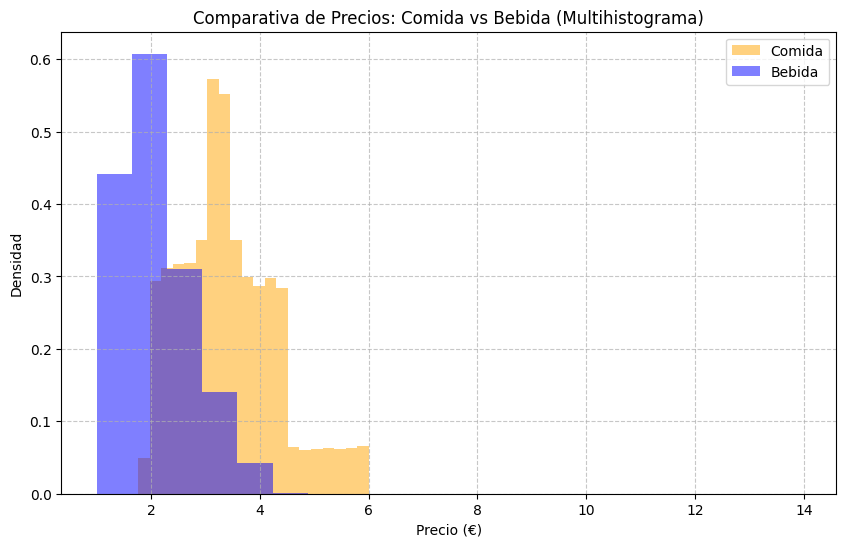

In [ ]:
# 4.5 Multihistogramas (Comparativa)

# Objetivo: Comparar la distribución de precios de Comida vs Bebida
plt.figure(figsize=(10, 6))

precio_comida = df[df['categoria'] == 'comida']['precio_unitario']
precio_bebida = df[df['categoria'] == 'bebida']['precio_unitario']

plt.hist(precio_comida, bins=20, alpha=0.5, label='Comida', color='orange', density=True)
plt.hist(precio_bebida, bins=20, alpha=0.5, label='Bebida', color='blue', density=True)

plt.title('Comparativa de Precios: Comida vs Bebida (Multihistograma)')
plt.xlabel('Precio (€)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

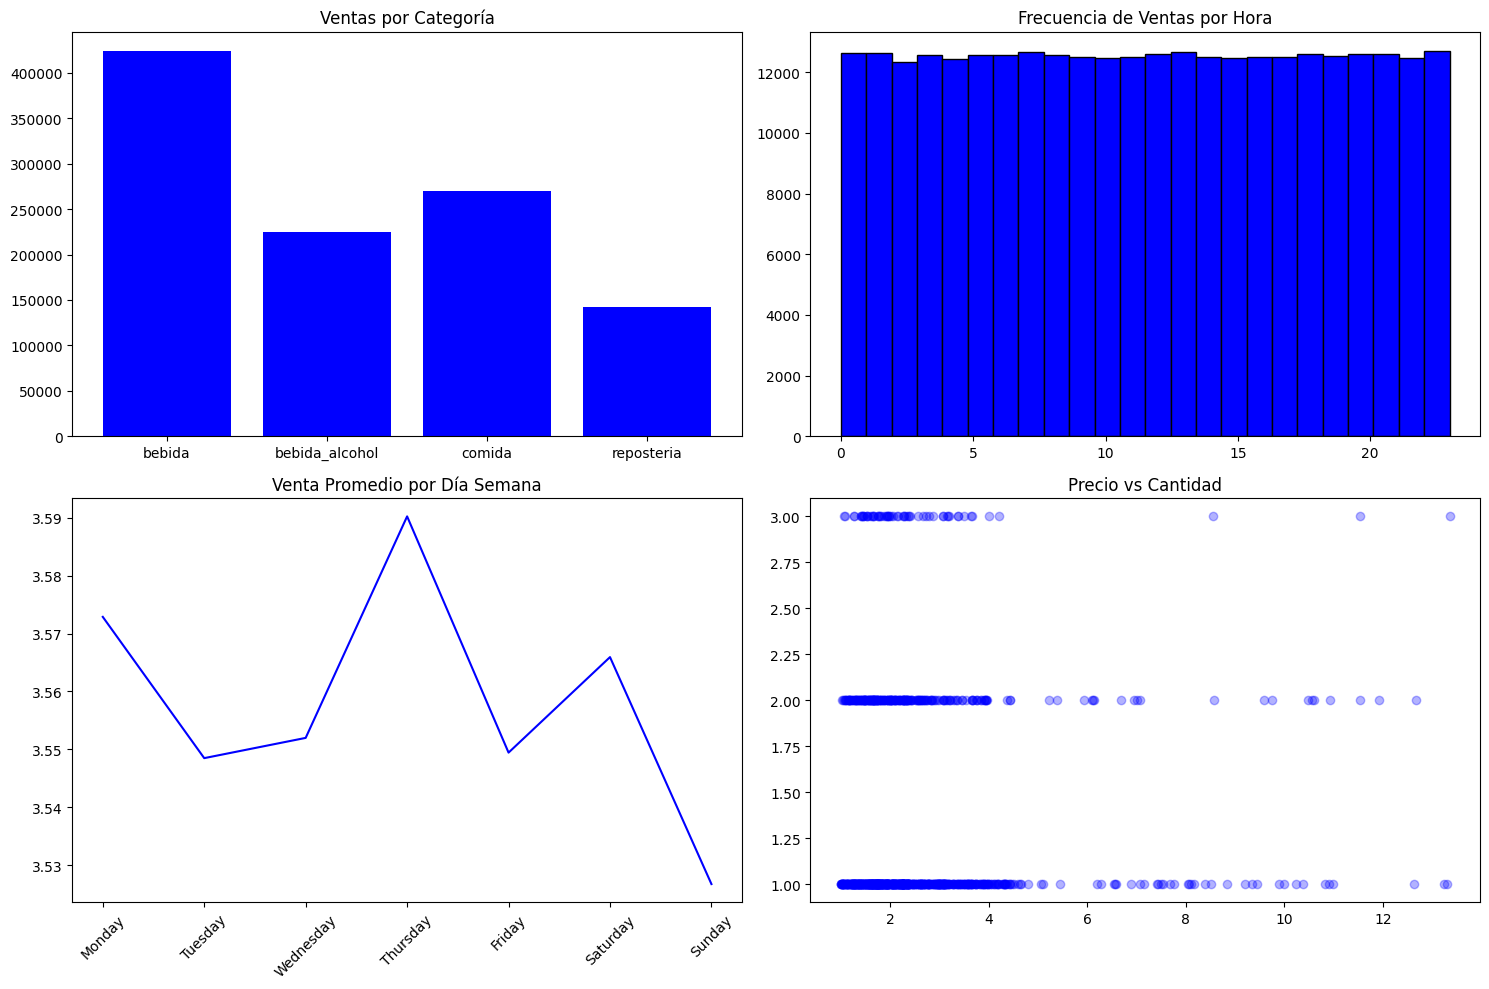

In [ ]:
# 4.6 Subplots Matplotlib (Dashboard)

# Objetivo: Mostrar 4 métricas clave de un vistazo
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 1. Barras: Ventas por Categoria
ventas_cat = df.groupby('categoria')['ventas_totales'].sum()
axs[0, 0].bar(ventas_cat.index, ventas_cat.values, color='blue')
axs[0, 0].set_title('Ventas por Categoría')

# 2. Histograma: Hora de venta
axs[0, 1].hist(df['hora'], bins=24, color='blue', edgecolor='black')
axs[0, 1].set_title('Frecuencia de Ventas por Hora')

# 3. Línea: Ventas por día de semana (ordenado)
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_dia = df.groupby('dia_semana')['ventas_totales'].mean().reindex(dias_orden)
axs[1, 0].plot(ventas_dia.index, ventas_dia.values, color='blue')
axs[1, 0].set_title('Venta Promedio por Día Semana')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter: Precio vs Cantidad
axs[1, 1].scatter(sample['precio_unitario'], sample['cantidad'], alpha=0.3, color='blue')
axs[1, 1].set_title('Precio vs Cantidad')

plt.tight_layout()
plt.show()

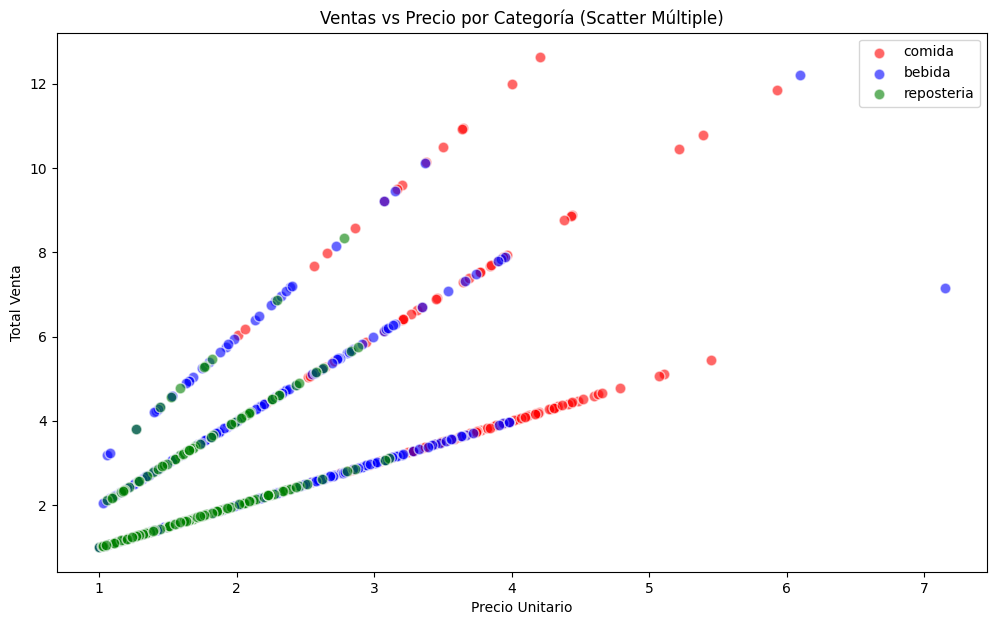

In [ ]:
# 4.7 Scatter Multiple (Dispersión con Categoría)

# Objetivo: Scatter plot coloreado por categoría
plt.figure(figsize=(12, 7))

colores = {'comida': 'red', 'bebida': 'blue', 'reposteria': 'green'}
for cat, color in colores.items():
    data_cat = sample[sample['categoria'] == cat]
    plt.scatter(data_cat['precio_unitario'], data_cat['ventas_totales'], 
                label=cat, c=color, alpha=0.6, edgecolors='w', s=60)

plt.title('Ventas vs Precio por Categoría (Scatter Múltiple)')
plt.xlabel('Precio Unitario')
plt.ylabel('Total Venta')
plt.legend()
plt.show()

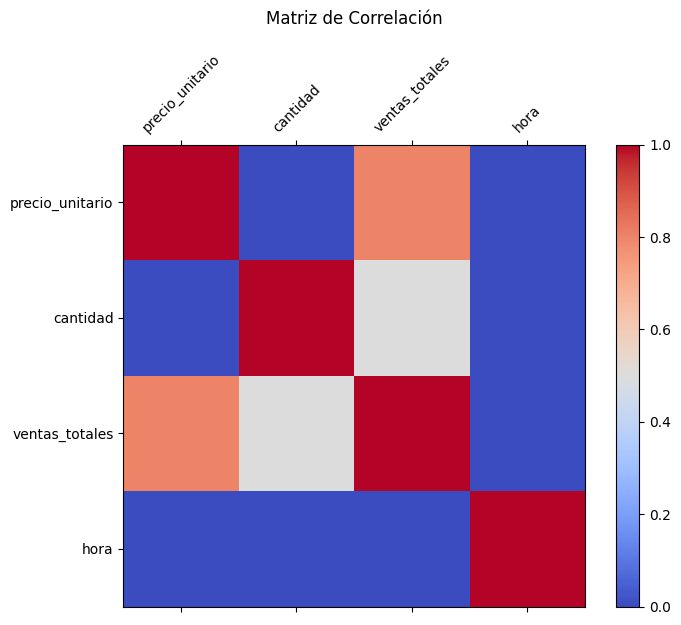

In [ ]:
# 4.8 Matriz de Correlación

# Objetivo: Ver qué variables numéricas están relacionadas
# Seleccionamos solo columnas numéricas
cols_num = ['precio_unitario', 'cantidad', 'ventas_totales', 'hora']
corr = df[cols_num].corr()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)

# Etiquetas
plt.xticks(range(len(cols_num)), cols_num, rotation=45)
plt.yticks(range(len(cols_num)), cols_num)
plt.title('Matriz de Correlación', pad=20)


plt.show()

## **5. Análisis de Negocio (Estratégico)**

- Oportunidad Geográfica
- Productos más rentables
- Mejor tipo de Local

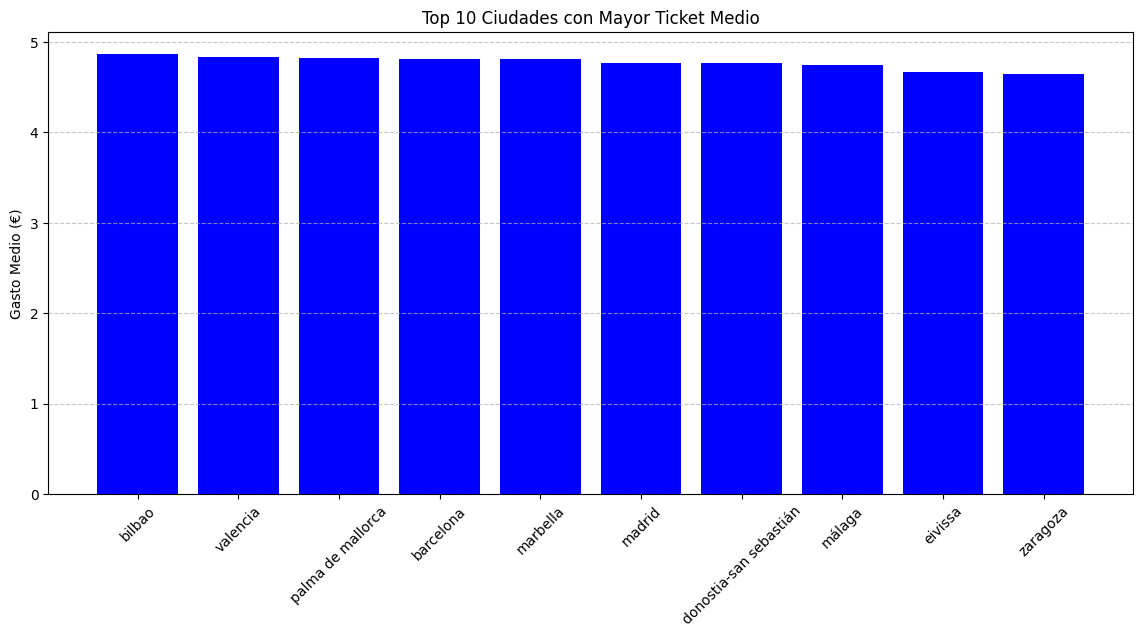

In [ ]:
# 5.1 Oportunidad Geográfica (Bar Plot)

# Top ciudades por Ticket Medio
plt.figure(figsize=(14, 6))
ticket_medio = df.groupby('ciudad')['ventas_totales'].mean().sort_values(ascending=False).head(10)

plt.bar(ticket_medio.index, ticket_medio.values, color='blue')
plt.title('Top 10 Ciudades con Mayor Ticket Medio')
plt.ylabel('Gasto Medio (€)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

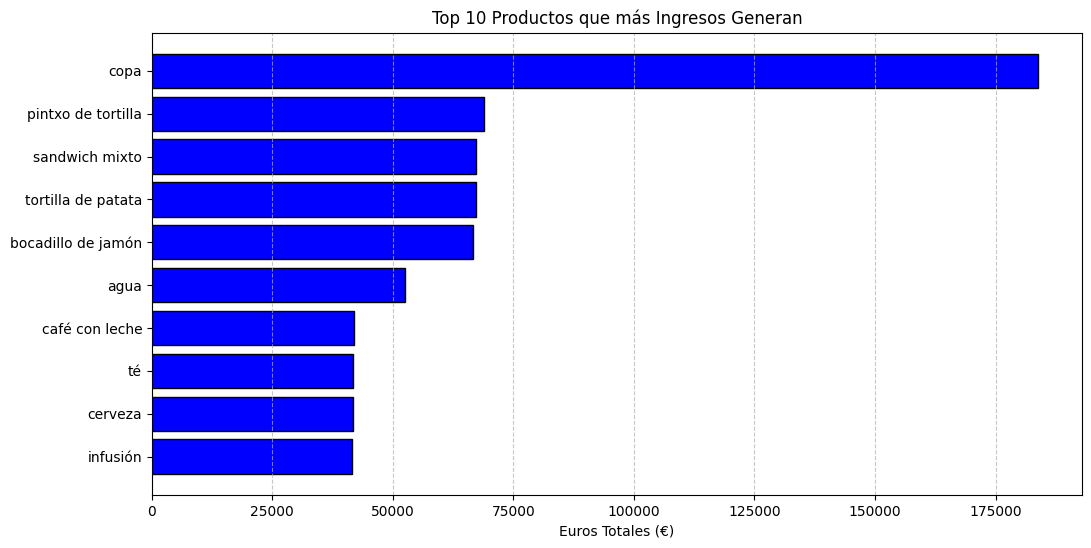

In [ ]:
# 5.2 Productos más rentable (Barh Plot)

# Top 10 Productos por Ingresos
plt.figure(figsize=(12, 6))
top_prod = df.groupby('producto')['ventas_totales'].sum().sort_values(ascending=True).tail(10)
plt.barh(top_prod.index, top_prod.values, color='blue', edgecolor='black')
plt.title('Top 10 Productos que más Ingresos Generan')
plt.xlabel('Euros Totales (€)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

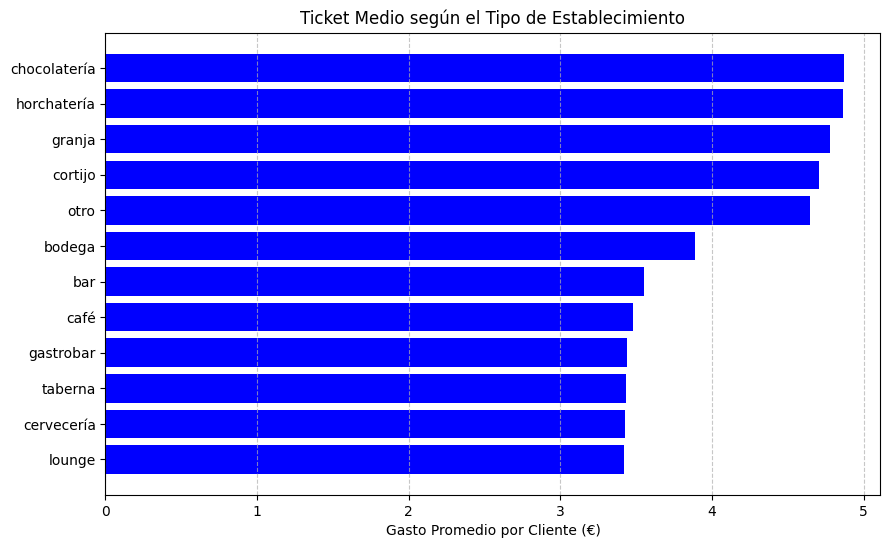

In [ ]:
# 5.3 Mejor tipo de Local (Barh Plot)

# Ticket Medio por Tipo de Establecimiento
plt.figure(figsize=(10, 6))
tipo_stats = df.groupby('tipo_local')['ventas_totales'].mean().sort_values(ascending=True)
plt.barh(tipo_stats.index, tipo_stats.values, color='blue')
plt.title('Ticket Medio según el Tipo de Establecimiento')
plt.xlabel('Gasto Promedio por Cliente (€)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## **6. Informe de Conclusiones y Recomendaciones Estratégicas**
Tras el análisis exploratorio y técnico de los cientos de miles de registros de ventas, se presentan las conclusiones clave para apoyar la toma de decisiones estratégicas de la empresa:

### **6.1. ¿Qué vender? (Estrategia de Producto)**
- Identificación de "Productos Estrella": El análisis de ingresos revela que el éxito financiero no depende solo del volumen de café. Productos como la "Copa", el "Pintxo de tortilla" y el "Sandwich mixto" lideran la facturación total.

- Recomendación: Se debe asegurar la disponibilidad constante de estos productos de alta rentabilidad y considerar la creación de "combos" que incluyan un producto de alto volumen (café) con uno de alto valor (repostería o tortilla) para aumentar el ticket medio.

### **6.2. ¿Dónde vender? (Expansión Geográfica)**
- Potencial de Mercado: No todas las ciudades se comportan igual. Gracias al Análisis de Ticket Medio (Gráfico 5.1), hemos identificado las 10 ciudades donde el cliente gasta más por cada visita.

- Diferenciación de Precios: El gráfico 4.2 demuestra que existe una variabilidad de precios regional.

- Recomendación: Priorizar la apertura de nuevos locales en las ciudades situadas en el top del ranking de ticket medio. En estas zonas, la estrategia de precios puede ser más agresiva ("Premium"), ya que el mercado local demuestra una mayor disposición al gasto.

### **6.3. ¿Cómo posicionarse? (Modelo de Negocio)**
- Especialización vs. Generalismo: Los datos sugieren que los formatos de establecimiento especializados (como Chocolaterías, Horchaterías o Gastrobares) suelen registrar un gasto promedio por cliente superior a los "Bares" o "Cafeterías" tradicionales.

- Recomendación: Para las nuevas aperturas, se recomienda evitar el formato de bar genérico y apostar por un posicionamiento de Gastrobar o local especializado. Esto permite justificar precios más altos y atraer a un perfil de consumidor con mayor poder adquisitivo.

### **6.4. Hábitos de Consumo (Eficiencia Operativa)**
- Franjas Críticas: Los histogramas de horas muestran picos de actividad muy marcados (Desayunos y Meriendas/Afterwork).

- Recomendación: Optimizar la plantilla de trabajadores para reforzar exclusivamente estas horas punta, reduciendo costes operativos en las horas valle (mediodía o madrugada) donde la actividad cae drásticamente.

### **Resumen final para la Directiva:**
"La expansión debe enfocarse en ciudades de alto **ticket medio** (Bilbao, Valencia...), utilizando un formato de **Gastrobar** especializado y centrando la comunicación en productos de **comida y copas**, que son los que realmente traccionan la rentabilidad del negocio por encima del café tradicional."